# Implementación de una Red Neuronal para la Detección de Cáncer con PyTorch

# Importación de Bibliotecas

En este bloque de código, se importan las bibliotecas y módulos necesarios para llevar a cabo la implementación de una red neuronal para la detección de cáncer. A continuación, se detallan las bibliotecas utilizadas:


- `pandas`: Esta biblioteca se emplea para la manipulación de datos en forma de DataFrames, facilitando el procesamiento de datos tabulares.

- `numpy`: Se utiliza para realizar operaciones matriciales y numéricas eficientes, lo que es fundamental en la manipulación de datos y cálculos de redes neuronales.

- `torch`: Se importa para trabajar con PyTorch, una biblioteca ampliamente utilizada en la implementación de redes neuronales.

- `torch.utils.data`: Este módulo se utiliza para manejar conjuntos de datos en PyTorch, incluyendo la creación de conjuntos de datos y cargadores de datos.

- `nn` y `optim` de `torch`: Se emplean para definir y optimizar modelos de redes neuronales, respectivamente.

- `sklearn.metrics.accuracy_score`: Es utilizado para calcular la precisión del modelo, una métrica común en problemas de clasificación.

- `sklearn.model_selection.train_test_split`: Esta función permite dividir el conjunto de datos en conjuntos de entrenamiento y prueba, esencial para el proceso de evaluación del modelo.

- `tqdm`: Se utiliza para mostrar barras de progreso durante el entrenamiento del modelo, lo que facilita el seguimiento del proceso.

- `sklearn.datasets.load_breast_cancer`: Se importa el conjunto de datos de cáncer de mama proporcionado por scikit-learn, que se utilizará en este proyecto.


In [3]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.datasets import load_breast_cancer

# Cargar el Conjunto de Datos y Dividirlo en Entrenamiento y Prueba

En esta sección del código, se realiza la preparación de los datos. A continuación, se describen los pasos clave:

1. **Carga del Conjunto de Datos**: Se utiliza la función `load_breast_cancer()` para cargar el conjunto de datos de cáncer de mama proporcionado por scikit-learn. Los datos se almacenan en las variables `X` (características) y `y` (etiquetas).

2. **División en Conjuntos de Entrenamiento y Prueba**: Los datos se dividen en dos conjuntos: entrenamiento y prueba, utilizando la función `train_test_split()`. Se reserva el 20% de los datos para el conjunto de prueba, y se utiliza una semilla (`random_state`) para garantizar reproducibilidad.

3. **Conversión a Tensores de PyTorch**: Los datos, que inicialmente son matrices numpy, se convierten en tensores de PyTorch. Se utilizan tensores de tipo `float32` para las características (`X_train_tensor` y `X_test_tensor`) y tensores de tipo `long` para las etiquetas (`y_train_tensor` y `y_test_tensor`).

4. **Creación de Conjuntos de Datos TensorDataset**: Se crean conjuntos de datos `TensorDataset` tanto para el conjunto de entrenamiento como para el de prueba. Estos conjuntos permiten combinar las características y las etiquetas en un formato que PyTorch puede manejar fácilmente.

5. **Creación de DataLoaders**: Finalmente, se crean DataLoaders para el conjunto de entrenamiento y el conjunto de prueba utilizando los conjuntos de datos `TensorDataset`. Estos DataLoaders se utilizan posteriormente para iterar sobre los datos en lotes durante el entrenamiento y la evaluación de la red neuronal.

Este proceso asegura que los datos estén listos y en el formato adecuado para ser utilizados en el entrenamiento y prueba de la red neuronal.


In [4]:
# Cargar el conjunto de datos y dividirlo en entrenamiento y prueba
breast_dataset = load_breast_cancer()
X = breast_dataset.data
y = breast_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Convertir los datos de numpy a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Crear conjuntos de datos TensorDataset para entrenamiento y prueba
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Crear DataLoaders para entrenamiento y prueba
batch_size = 15  # Tamaño del lote
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definición de la Arquitectura de la Red Neuronal

En este bloque de código, se define la arquitectura de la red neuronal. A continuación, se describen los aspectos clave de la arquitectura:

- **Clase `Red`**: Se define una clase llamada `Red` que hereda de `nn.Module`, una clase base de PyTorch para la construcción de modelos de redes neuronales.

- **Módulos Lineales**: La red consta de tres capas lineales definidas mediante `nn.Linear`. Cada capa lineal se describe como sigue:
  - `self.linear1`: Primera capa lineal con `n_entradas` neuronas de entrada y 15 neuronas de salida. La función de activación utilizada en esta capa es la función sigmoide (`torch.sigmoid`).
  - `self.linear2`: Segunda capa lineal con 15 neuronas de entrada y 8 neuronas de salida. También utiliza la función sigmoide como función de activación.
  - `self.linear3`: Tercera capa lineal con 8 neuronas de entrada y 2 neuronas de salida. Esta capa es la capa de salida utilizada para la clasificación binaria, por lo que no se aplica una función de activación.

- **Método `forward`**: En el método `forward`, se define cómo se propagan las entradas a través de la red. Se aplican las funciones sigmoide en las dos primeras capas lineales (`pred_1` y `pred_2`) y no se aplica ninguna función de activación en la capa de salida (`pred_f`). La salida final de la red se obtiene de `pred_f`.


In [5]:
# Definir la arquitectura de la red neuronal
class Red(nn.Module):
    def __init__(self, n_entradas):
        super(Red, self).__init__()
        self.linear1 = nn.Linear(n_entradas, 15)
        self.linear2 = nn.Linear(15, 8)
        self.linear3 = nn.Linear(8, 2)  # 2 salidas para clasificación binaria

    def forward(self, inputs):
        pred_1 = torch.sigmoid(self.linear1(inputs))
        pred_2 = torch.sigmoid(self.linear2(pred_1))
        pred_f = self.linear3(pred_2)
        return pred_f

# Definición de Hiperparámetros y Creación del Modelo

En esta sección del código, se definen los hiperparámetros clave para la configuración del entrenamiento y se crea una instancia del modelo de red neuronal. A continuación, se describen los aspectos clave:

- **Tasa de Aprendizaje (lr)**: Se define la tasa de aprendizaje (`lr`) con un valor de 0.001. Esta tasa de aprendizaje determina el tamaño de los pasos que se toman durante el proceso de optimización.

- **Número de Entradas (n_entradas)**: El número de neuronas de entrada se obtiene a partir de la forma de los datos de entrenamiento (`X_train`). Esto se hace con el fin de configurar correctamente la capa de entrada de la red.

- **Creación del Modelo**: Se crea una instancia del modelo de red neuronal llamado `model`. El modelo se inicializa con la arquitectura definida previamente en la clase `Red` y se pasa el número de entradas correspondiente.

- **Función de Pérdida (loss_fn)**: Se define la función de pérdida que se utilizará durante el entrenamiento. En este caso, se utiliza `nn.CrossEntropyLoss()`, que es adecuada para problemas de clasificación.

- **Optimizador**: Se crea un optimizador llamado `optimizer` utilizando el algoritmo de descenso de gradiente estocástico (SGD). El optimizador se configura para actualizar los parámetros del modelo con la tasa de aprendizaje definida anteriormente.



In [6]:
# Definir hiperparámetros y crear el modelo
lr = 0.001

n_entradas = X_train.shape[1]
model = Red(n_entradas=n_entradas)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Entrenamiento del Modelo

En esta sección del código, se define la función de entrenamiento y se inicia el proceso de entrenamiento de la red neuronal. A continuación, se describen los aspectos clave:

- **Listas para el Seguimiento**: Se inicializan tres listas vacías: `MLossXepoc` para almacenar las pérdidas promedio por época, `ACCxEpoc` para almacenar las precisiones por época y `epochX` para almacenar el número de épocas. Estas listas se utilizan para realizar un seguimiento del progreso del entrenamiento.

- **Función de Entrenamiento (train)**: Se define la función `train` que realiza una época de entrenamiento. Dentro de esta función:
  - El modelo se coloca en modo de entrenamiento (`model.train()`).
  - Se define la función de pérdida utilizando `torch.nn.CrossEntropyLoss()`.
  - Se inicializan listas para almacenar las pérdidas y se establecen contadores para el número de predicciones correctas y ejemplos totales.
  - Se itera a través de los lotes de datos en el `train_loader` utilizando `enumerate(tqdm(train_loader))` para mostrar una barra de progreso.
  - Se envían los datos y etiquetas al dispositivo especificado (en este caso, CPU) y se realizan los pasos de optimización para ajustar los parámetros del modelo.
  - Se calcula la precisión del modelo en el lote actual y se actualizan los contadores de predicciones correctas y ejemplos totales.
  - Se almacena la pérdida promedio y la precisión en las listas correspondientes (`MLossXepoc` y `ACCxEpoc`).
  - Se muestra el progreso del entrenamiento en cada época, incluyendo la pérdida y la precisión.

- **Bucle de Entrenamiento**: Se inicia un bucle `for` que ejecuta el entrenamiento durante 99 épocas. Dentro del bucle, se llama a la función `train` para entrenar la red en cada época. El dispositivo se establece en "cpu" en este ejemplo.

Este código realiza el entrenamiento de la red neuronal durante múltiples épocas y realiza un seguimiento de la pérdida y la precisión en cada época para evaluar el rendimiento del modelo.


In [8]:
MLossXepoc = []
ACCxEpoc = []
epochX = []

def train(model, train_loader, optimizer, epoch, device):
    
    model.train()
    criterion = torch.nn.CrossEntropyLoss()
    losses = []
    correct = 0  # Inicializar el contador de predicciones correctas
    total = 0    # Inicializar el contador de ejemplos totales
    

    
    for _batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())     
                
        # Calcular la precisión
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
    accuracy = 100 * correct / total  # Calcular la precisión en porcentaje
    mean_loss = np.mean(losses)*100
    
    MLossXepoc.append(mean_loss)
    ACCxEpoc.append(accuracy)
    epochX.append(epoch)
    
          
    print(
        f"Train Epoch: {epoch} \t"
        f"Loss: {mean_loss:.6f}%"
        f"Accuracy: {accuracy:.2f}% "  # Mostrar la precisión
       )
    
for epoch in range(1, 100):
    train(model, train_loader, optimizer, epoch, device="cpu")

100%|██████████| 31/31 [00:00<00:00, 1120.23it/s]


Train Epoch: 1 	Loss: 77.324213%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1145.10it/s]


Train Epoch: 2 	Loss: 76.068426%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1080.18it/s]


Train Epoch: 3 	Loss: 74.689725%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1148.72it/s]


Train Epoch: 4 	Loss: 74.087723%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1136.75it/s]


Train Epoch: 5 	Loss: 72.968188%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1126.49it/s]


Train Epoch: 6 	Loss: 72.194831%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 966.59it/s]


Train Epoch: 7 	Loss: 71.447914%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1217.60it/s]


Train Epoch: 8 	Loss: 70.898498%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1236.05it/s]


Train Epoch: 9 	Loss: 70.308617%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1223.76it/s]


Train Epoch: 10 	Loss: 69.869097%Accuracy: 36.70% 


100%|██████████| 31/31 [00:00<00:00, 1379.03it/s]


Train Epoch: 11 	Loss: 69.361523%Accuracy: 44.18% 


100%|██████████| 31/31 [00:00<00:00, 1374.86it/s]


Train Epoch: 12 	Loss: 68.885218%Accuracy: 69.89% 


100%|██████████| 31/31 [00:00<00:00, 1441.13it/s]


Train Epoch: 13 	Loss: 68.326963%Accuracy: 66.81% 


100%|██████████| 31/31 [00:00<00:00, 1375.31it/s]


Train Epoch: 14 	Loss: 67.781950%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1362.06it/s]


Train Epoch: 15 	Loss: 67.339294%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1338.09it/s]


Train Epoch: 16 	Loss: 66.656763%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1170.62it/s]


Train Epoch: 17 	Loss: 66.332341%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1306.74it/s]


Train Epoch: 18 	Loss: 66.059912%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1331.72it/s]


Train Epoch: 19 	Loss: 66.025465%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1070.57it/s]


Train Epoch: 20 	Loss: 65.865614%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1125.83it/s]


Train Epoch: 21 	Loss: 65.723789%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1136.60it/s]


Train Epoch: 22 	Loss: 65.387926%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1330.53it/s]


Train Epoch: 23 	Loss: 65.373880%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1163.97it/s]


Train Epoch: 24 	Loss: 65.209550%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1164.75it/s]


Train Epoch: 25 	Loss: 65.340092%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1128.56it/s]


Train Epoch: 26 	Loss: 64.995679%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1092.43it/s]


Train Epoch: 27 	Loss: 64.964195%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1032.00it/s]


Train Epoch: 28 	Loss: 64.771913%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1455.98it/s]


Train Epoch: 29 	Loss: 64.505076%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1477.67it/s]


Train Epoch: 30 	Loss: 64.692417%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1036.95it/s]


Train Epoch: 31 	Loss: 64.780910%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1469.19it/s]


Train Epoch: 32 	Loss: 64.677006%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1464.59it/s]


Train Epoch: 33 	Loss: 64.307546%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1381.58it/s]


Train Epoch: 34 	Loss: 64.378709%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1430.21it/s]


Train Epoch: 35 	Loss: 64.015403%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1274.44it/s]


Train Epoch: 36 	Loss: 64.495146%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1058.50it/s]


Train Epoch: 37 	Loss: 64.071801%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1245.73it/s]


Train Epoch: 38 	Loss: 64.358426%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1179.63it/s]


Train Epoch: 39 	Loss: 63.782763%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1102.51it/s]


Train Epoch: 40 	Loss: 64.123135%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1023.21it/s]


Train Epoch: 41 	Loss: 64.483966%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1133.96it/s]


Train Epoch: 42 	Loss: 64.071290%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1057.40it/s]


Train Epoch: 43 	Loss: 64.205418%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1135.71it/s]


Train Epoch: 44 	Loss: 63.772355%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1057.19it/s]


Train Epoch: 45 	Loss: 63.753136%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1022.60it/s]


Train Epoch: 46 	Loss: 63.739926%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1063.26it/s]


Train Epoch: 47 	Loss: 63.874011%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 999.21it/s]


Train Epoch: 48 	Loss: 63.615399%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1079.53it/s]


Train Epoch: 49 	Loss: 64.054523%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1019.06it/s]


Train Epoch: 50 	Loss: 63.991000%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1014.77it/s]


Train Epoch: 51 	Loss: 63.761268%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1060.61it/s]


Train Epoch: 52 	Loss: 63.737151%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1027.46it/s]


Train Epoch: 53 	Loss: 63.926848%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1046.60it/s]


Train Epoch: 54 	Loss: 63.276555%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1212.70it/s]


Train Epoch: 55 	Loss: 63.698105%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1011.30it/s]


Train Epoch: 56 	Loss: 63.415420%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 915.88it/s]


Train Epoch: 57 	Loss: 63.820402%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1017.53it/s]


Train Epoch: 58 	Loss: 63.402252%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1240.02it/s]


Train Epoch: 59 	Loss: 63.357741%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1254.11it/s]


Train Epoch: 60 	Loss: 63.536168%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1302.79it/s]


Train Epoch: 61 	Loss: 63.112367%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1159.43it/s]


Train Epoch: 62 	Loss: 63.288906%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1233.99it/s]


Train Epoch: 63 	Loss: 63.475385%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1209.61it/s]


Train Epoch: 64 	Loss: 63.265704%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1241.46it/s]


Train Epoch: 65 	Loss: 63.444751%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1010.15it/s]


Train Epoch: 66 	Loss: 63.449450%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1146.53it/s]


Train Epoch: 67 	Loss: 62.980371%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1244.83it/s]


Train Epoch: 68 	Loss: 63.647473%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1122.46it/s]


Train Epoch: 69 	Loss: 63.348467%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1171.10it/s]


Train Epoch: 70 	Loss: 63.557183%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1023.47it/s]


Train Epoch: 71 	Loss: 63.335661%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1057.16it/s]


Train Epoch: 72 	Loss: 63.311580%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1091.39it/s]


Train Epoch: 73 	Loss: 63.086570%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1118.23it/s]


Train Epoch: 74 	Loss: 63.075765%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1310.23it/s]


Train Epoch: 75 	Loss: 63.017913%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1115.37it/s]


Train Epoch: 76 	Loss: 62.796042%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1232.78it/s]


Train Epoch: 77 	Loss: 63.438209%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 759.07it/s]


Train Epoch: 78 	Loss: 63.420997%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 967.59it/s]


Train Epoch: 79 	Loss: 63.211022%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1001.03it/s]


Train Epoch: 80 	Loss: 63.159938%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1229.23it/s]


Train Epoch: 81 	Loss: 62.713515%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1224.87it/s]


Train Epoch: 82 	Loss: 63.346419%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1202.87it/s]


Train Epoch: 83 	Loss: 63.396655%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1126.44it/s]


Train Epoch: 84 	Loss: 63.083217%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1033.84it/s]


Train Epoch: 85 	Loss: 62.808740%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1012.27it/s]


Train Epoch: 86 	Loss: 62.625497%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1257.66it/s]


Train Epoch: 87 	Loss: 63.047621%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 1222.23it/s]


Train Epoch: 88 	Loss: 62.815448%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 875.20it/s]


Train Epoch: 89 	Loss: 62.584158%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 865.94it/s]


Train Epoch: 90 	Loss: 62.925030%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 896.03it/s]


Train Epoch: 91 	Loss: 62.976312%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 937.76it/s]


Train Epoch: 92 	Loss: 63.013936%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 928.18it/s]


Train Epoch: 93 	Loss: 63.186048%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 854.46it/s]


Train Epoch: 94 	Loss: 62.913711%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 799.56it/s]


Train Epoch: 95 	Loss: 62.869587%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 892.63it/s]


Train Epoch: 96 	Loss: 62.836438%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 959.14it/s]


Train Epoch: 97 	Loss: 63.048579%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 920.51it/s]


Train Epoch: 98 	Loss: 62.607765%Accuracy: 63.30% 


100%|██████████| 31/31 [00:00<00:00, 860.06it/s]

Train Epoch: 99 	Loss: 62.795309%Accuracy: 63.30% 


# Función para Graficar Métricas

En este bloque de código, se define la función `plot_metrics`, que se utiliza para crear y mostrar gráficos de métricas de entrenamiento y evaluación. A continuación, se describen los aspectos clave de esta función:

- **Parámetros de Entrada**:
  - `title`: El título del gráfico.
  - `x_label`: Etiqueta del eje x.
  - `y_label`: Etiqueta del eje y.
  - `data1`: Los datos para la primera serie que se graficará.
  - `label1`: La etiqueta para la primera serie.
  - `data2`: Los datos para la segunda serie que se graficará.
  - `label2`: La etiqueta para la segunda serie.
  - `x_data`: Los datos para el eje x (por ejemplo, el número de épocas).
  - `filename`: El nombre del archivo en el que se guardará el gráfico como imagen.

- **Configuración del Gráfico**:
  - Se establece el tamaño del gráfico utilizando `plt.figure(figsize=(10, 6))`.
  - Se grafican las dos series de datos (`data1` y `data2`) con líneas punteadas de diferentes colores y se etiquetan con `label1` y `label2`.
  - Se configuran las etiquetas de los ejes x e y y el título del gráfico.
  - Se agrega una leyenda para diferenciar las dos series.
  - Se muestra una cuadrícula en el gráfico con un estilo punteado y transparencia.
  - Se ajusta el diseño del gráfico utilizando `plt.tight_layout()` para evitar solapamientos.

- **Guardado y Visualización**:
  - Finalmente, se guarda el gráfico como una imagen con el nombre especificado en `filename` utilizando `plt.savefig()`.
  - Se muestra el gráfico en la salida.

Esta función es útil para visualizar métricas de entrenamiento y evaluación, como pérdida y precisión, a lo largo de las épocas o iteraciones durante el entrenamiento de la red neuronal.


In [9]:
import matplotlib.pyplot as plt

def plot_metrics(title, x_label, y_label, data1, label1, data2, label2, x_data, filename):
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    plt.plot(x_data, data1, marker='o', linestyle='--', color='b', label=label1, linewidth=2)
    plt.plot(x_data, data2, marker='o', linestyle='--', color='g', label=label2, linewidth=2)
    plt.xlabel(x_label, fontsize=14)  # Etiqueta del eje x
    plt.ylabel(y_label, fontsize=14)  # Etiqueta del eje y
    plt.title(title, fontsize=16)  # Título del gráfico
    plt.legend(fontsize=12)  # Leyenda
    plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula con estilo
    plt.tight_layout()  # Ajuste de diseño
    plt.savefig(filename)  # Guardar el gráfico como imagen
    plt.show()

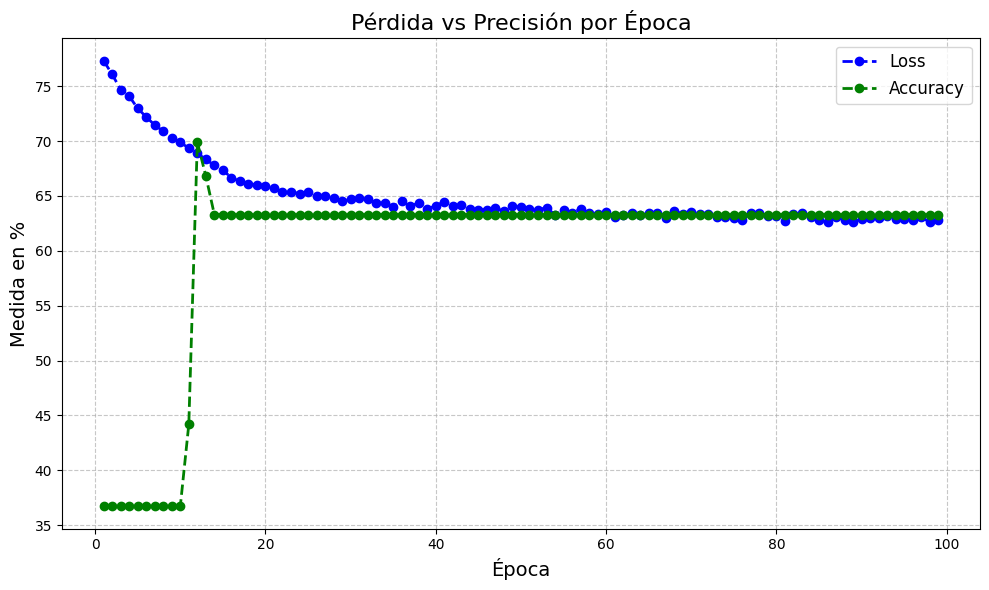

In [10]:
plot_metrics('Pérdida vs Precisión por Época', 'Época', 'Medida en %', MLossXepoc, 'Loss', ACCxEpoc, 'Accuracy', epochX, 'loss_vs_acc.png')

# Observaciones sobre el Rendimiento del Modelo

Basándonos en los resultados proporcionados durante el entrenamiento del modelo, podemos hacer las siguientes observaciones:

1. **Pérdida Promedio por Época**:
   - La pérdida promedio disminuye gradualmente a medida que aumenta el número de épocas.
   - Inicialmente, la pérdida es alta, pero se observa una tendencia a la disminución. Esto sugiere que el modelo está aprendiendo de los datos de entrenamiento.

2. **Precisión por Época**:
   - La precisión muestra un patrón diferente al de la pérdida.
   - Inicialmente, la precisión es baja (alrededor del 36.70%), lo que indica que el modelo está realizando predicciones aleatorias.
   - A medida que progresa el entrenamiento, la precisión mejora significativamente, alcanzando alrededor del 69.89% en la época 11.
   - Luego, la precisión se estabiliza en alrededor del 63.30% y no parece mejorar más.

3. **Número de Épocas**:
   - Se realizaron 99 épocas de entrenamiento.

El modelo inicialmente tiene dificultades para aprender los patrones en los datos y realiza predicciones aleatorias. Sin embargo, a medida que se aumenta el número de épocas, el modelo comienza a aprender y mejora su precisión. Sin embargo, después de alrededor de 11 épocas, la mejora se estabiliza y la precisión parece mantenerse en alrededor del 63.30%. Esto podría indicar que el modelo ha alcanzado su capacidad de aprendizaje en los datos de entrenamiento y no se beneficia significativamente de más épocas de entrenamiento.

Evaluar el modelo de manera más completa, es importante realizar pruebas en un conjunto de datos de prueba separado y considerar otras métricas de evaluación, como la matriz de confusión y el área bajo la curva ROC, para comprender mejor su rendimiento en la detección de cáncer de mama.


# Referencia de Inspiración

Gran parte del código y la estructura de este proyecto se basaron en el trabajo previamente realizado por [Alejandro Puig](https://github.com/puigalex/Pytorch_churn). Este recurso proporcionó valiosa orientación y ejemplos que sirvieron como punto de partida para el desarrollo de este proyecto.

Agradecemos al autor del repositorio original por su contribución a la comunidad de aprendizaje de PyTorch y por compartir su conocimiento.
